# Ejercicio 1:Clustering con K-Means

**Importamos las librerías que usaremos, junto a %matplotlib inline que habilita la visualización de los gráficos debajo de cadaa celda.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

**Cargamos y previsualizamos el dataset "Iris"; y creamos un dataframe para inspeccionar la data facilmente.**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Aplicamos StandardScaler para centrar los datos en 0 y la desviación en 1, ya que es una condición necesaria para K-Means y PCA.**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=feature_names).describe().loc[['mean','std']]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00


**Iniciamos K-Means buscando 3 clusters, ajustamos el modelo y vemos la etiqueta de cada punto y finalmente agregamos la etiqueta de cluster al dataframe original.**

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
labels3 = kmeans3.fit_predict(X_scaled)

df['cluster_K3'] = labels3
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_K3
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1


**Reducimos a 2 componentes principales para graficar, dibujamos la nube de cluster según el cluster al que pertenezca.**

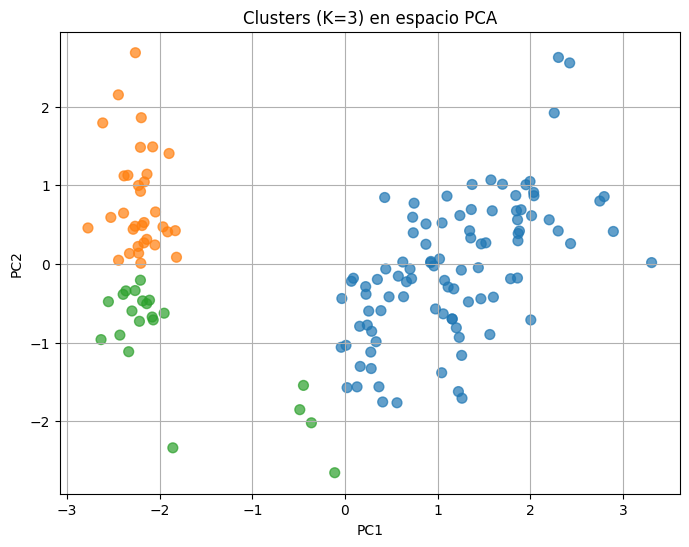

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=[palette[label] for label in labels3],
    s=50,
    alpha=0.7
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters (K=3) en espacio PCA')
plt.grid(True)
plt.show()


Para asignar cada cluster a la especie correspondiente, se construyóo la siguiente tabla:

| Cluster K=3 | Setosa (0) | Versicolor (1) | Virginica (2) |
| :---------: | :--------: | :------------: | :-----------: |
|      0      |     50     |        0       |       0       |
|      1      |      0     |       48       |       14      |
|      2      |      0     |        2       |       36      |

El cluster 0 agrupa las 50 muestras de "Iris setosa".

El cluster 1 agrupa la mayoría de "Iris versicolor" y algunas "Iris virginica".

El cluster 2 agrupa principalmente "Iris virginica" y un par de "versicolor".

Los puntos rojos, corresponden a Iris setosa, se ve aislado reflejando que sus sépalos y pétalos son más pequeños que las otras especies.

Los puntos azules corresponden myoritariamente a Iris virginica, que tiene las medidas más grandes de sépalo y pétalos.

Los puntos verdes corresponden principalmente a Iris versicolor, que tiene dimensiones intermedias.

**Evaluamos el número de clusters con Silhouette Score.**

In [ ]:
scores = []
for k in [2,3,4]:
    km = KMeans(n_clusters=k, random_state=42)
    lab = km.fit_predict(X_scaled)
    sc = silhouette_score(X_scaled, lab)
    scores.append({'K': k, 'Silhouette': sc})

df_scores= pd.DataFrame(scores)
df_scores


,K,Silhouette
0,2,0.581750
1,3,0.479881
2,4,0.385045


El *Silhouette Score* mide para cada punto la diferencia normalizada entre la distancia media al resto del propio cluster y la distancia media al cluster vecino más cercano. Sus valores están entre -1 y 1.

Los valores cercanos a 1 indican que los puntos están bien agrupados y separados de otros clusters, mientras que los valores cercanos a 0 señalan solapamiento.

En este caso, el *k=2* obtuvo aproximadamente un valor de 0.58, lo que nos sugiere que con dos clusters los grupos son más compactos y están mejor separados. El *k=3* obtuvo aproximadamente 0.48, lo que nos indica que al forzar tres clusters hay más puntos en la frontera. Y por ultimo, el *k=4* obtuvo aproximadamente 0.39, lo que nos dice que en este caso se empeora la separación, obteniendo clusters más pequeños y solapados.

Respondiendo a las últimas dos preguntas de este ejercicio, según *silueta* el valor óptimo de k es 2, ya que con dos clusters los puntos quedan , en promedio, más compactos dentro de su propio cluster.

En respuesta a la pregunta **¿Cómo se relacionan los clusters con las especies reales?**, cruzamos las etiquetas de K-Means (k=3) con las etiquetas verdaderas:

| Cluster K=3 | Setosa (0) | Versicolor (1) | Virginica (2) |
|:-----------:|:----------:|:--------------:|:-------------:|
|      0      |     50     |       0        |       0       |
|      1      |      0     |      48        |      14       |
|      2      |      0     |       2        |      36       |

Lo que nos confirma que K‑Means recupera perfectamente a setosa, mientras que versicolor y virginica quedan en dos clusters distintos pero con cierto solapamiento, reflejando la proximidad de sus medidas en el espacio original.

# Ejercicio 2: Clustering Jerárquico

**Importamos las librerías**

In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets     import load_wine
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pyplot as plt
%matplotlib inline


**Cargamos el dataset Wine y lo previsualizamos**

In [10]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names = wine.feature_names

df_wine = pd.DataFrame(X_wine, columns=feature_names)
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Estandarizamos las variables.**

In [11]:
scaler = StandardScaler()
Xw_scaled = scaler.fit_transform(X_wine)

pd.DataFrame(Xw_scaled, columns=feature_names).describe().loc[['mean','std']]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


**Calculamos linkage y el dendograma de enlace completo.**

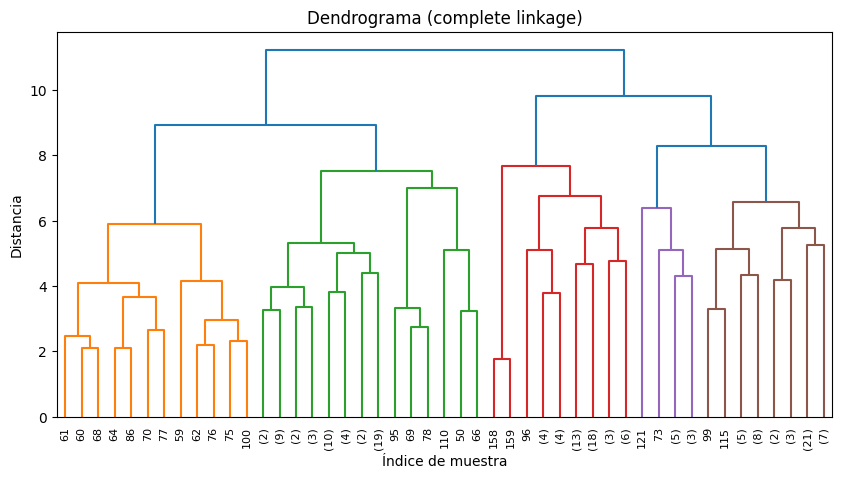

In [12]:
Z_complete = linkage(Xw_scaled, method='complete')

plt.figure(figsize=(10,5))
dendrogram(
    Z_complete,
    truncate_mode='level',
    p=5
)
plt.title('Dendrograma (complete linkage)')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()


Podemos observar que las muestras más parecidas se fucionan primero en alturas muy bajas formando subgrupos muy homogéneos. A medida que vamos subiendo, los subgrupos se van uniendo hasta que, alrededor de la distancia 8, se ve un salto significativo, lo que nos indica el punto para cortar y obtener clusters bien definidos.

**Cortamos en dendograma para obtener 3 clusters.**

In [13]:
clusters_hc = fcluster(Z_complete, t=3, criterion='maxclust')

df_wine['cluster_hc3'] = clusters_hc
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_hc3
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,3


**Comparamos las etiquetas originales con los clusters.**

In [14]:
ct = pd.crosstab(df_wine['cluster_hc3'], y_wine,
                 rownames=['Cluster HC (3)'],
                 colnames=['Clase real'])
ct

Clase real,0,1,2
Cluster HC (3),,,
1,51,18,0
2,0,3,48
3,8,50,0


**Graficamos un par de variables coloreadas por cluster.**

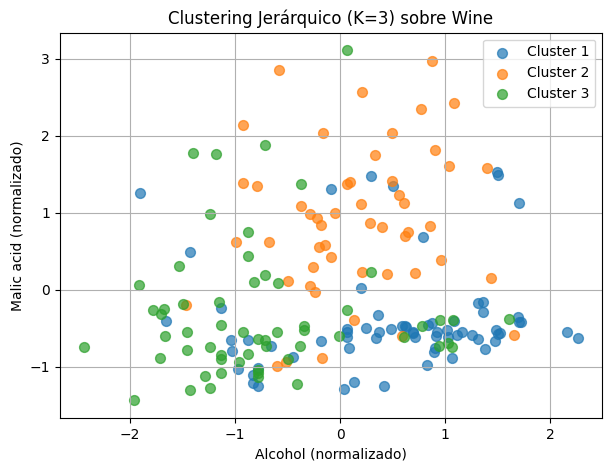

In [15]:
plt.figure(figsize=(7,5))
for cl in np.unique(clusters_hc):
    mask = clusters_hc == cl
    plt.scatter(
        Xw_scaled[mask, feature_names.index('alcohol')],
        Xw_scaled[mask, feature_names.index('malic_acid')],
        s=50, label=f'Cluster {cl}', alpha=0.7
    )
plt.xlabel('Alcohol (normalizado)')
plt.ylabel('Malic acid (normalizado)')
plt.title('Clustering Jerárquico (K=3) sobre Wine')
plt.legend()
plt.grid(True)
plt.show()


En el cluster 1 (puntos azules), se concentran vinos con mayor graduación alcohólica y baja acidez málica.

En el cluster 2 (puntos naranjas), se reunen vinos con mayor acidez málica y alcohol cercano a la media.

En el cluster 3 (puntos verdes) se agrupan vinos de alcohol y ácido málico por debajo de la media.

Aunque existe cierto solapamiento, cada cluster refleja un perfil distinto en las dos variables.

Respondiendo las preguntas:
**¿Qué diferencias observas entre enlace completo y enlace simple?**

El *enlace completo* mide la distancia máxima entre pares de puntos de dos clusters,  
  resultando en clusters más compactos y con forma más “esférica”, mientras que el *enlace simple* usa la distancia mínima, lo que puede generar clusters más alargados y con menos cohesión.

**¿Cómo afecta el método de enlace al número de clusters?**

Un enlace completo tiende a retrasar el momento de fusión de clusters (más niveles en el dendrograma antes de cortar), mientras que el simple fusiona antes, dando a menudo un número menor de clusters si se corta a la misma distancia.


# Ejercicio 3:DBSCAN

**Importamos las librerías.**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster   import DBSCAN
from sklearn.metrics   import silhouette_score
%matplotlib inline

**Generamos el dataset**

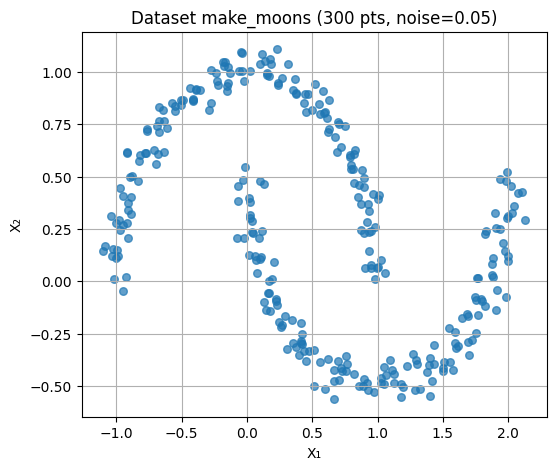

In [17]:
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=30, alpha=0.7)
plt.title('Dataset make_moons (300 pts, noise=0.05)')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.grid(True)
plt.show()

Aquí podemos observar al clásico "two-moons", que son semicírculos entrelazados con un poco de ruido. El patrón que se ve, nos confirma que los datos no son linealmente separables, ya que cada media luna forma un grupo curvo distinto.

**Probamos DBSCAN con varias combinaciones.**

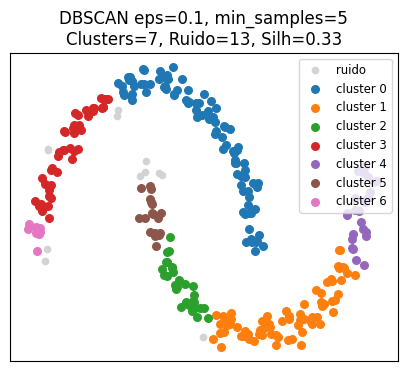

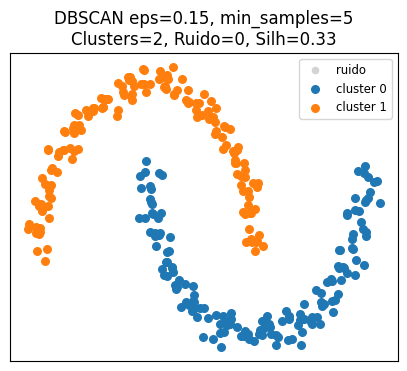

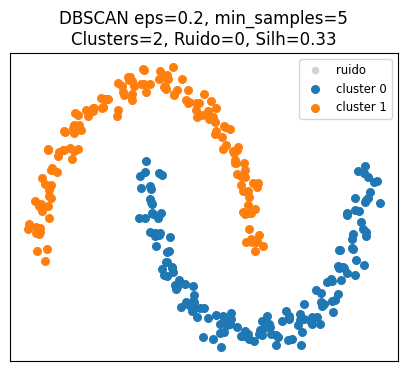

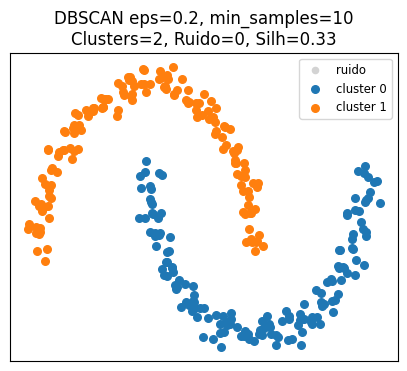

In [18]:
params = [
    (0.1, 5),
    (0.15, 5),
    (0.2, 5),
    (0.2, 10),
]

results = []

for eps, ms in params:
    db = DBSCAN(eps=eps, min_samples=ms)
    labels = db.fit_predict(X)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    n_noise = np.sum(labels == -1)

    mask = labels != -1
    if n_clusters >= 2:
        sil = silhouette_score(X[mask], labels[mask])
    else:
        sil = np.nan

    results.append({'eps': eps, 'min_samples': ms,
                    'clusters': n_clusters, 'noise': n_noise,
                    'silhouette': sil})

    plt.figure(figsize=(5,4))

    plt.scatter(X[labels==-1,0], X[labels==-1,1],
                c='lightgray', s=20, label='ruido')

    for cl in set(labels):
        if cl == -1: continue
        plt.scatter(X[labels==cl,0], X[labels==cl,1],
                    s=30, label=f'cluster {cl}')

    plt.title(f'DBSCAN eps={eps}, min_samples={ms}\n'
              f'Clusters={n_clusters}, Ruido={n_noise}, Silh={sil:.2f}')
    plt.legend(loc='upper right', fontsize='small')
    plt.xticks([])
    plt.yticks([])
    plt.show()

Al usar **eps = 0.1** (min_samples=5), DBSCAN fragmenta la luna en 7 clusters y marca 13 puntos como ruido, mostrando que el radio es demasiado pequeño. Al aumentar **eps ≥ 0.15** (tanto con min_samples=5 como 10), se recuperan exactamente **dos clusters** ,las dos lunas, sin ruido, manteniendo un coeficiente de silueta de ~0.33. Lo que nos indica que, en este dataset, la elección de **eps** es determinante para capturar correctamente la estructura curva, mientras que variar **min_samples** en este rango apenas modifica el resultado.


**Tabla con coeficientes de silueta y clusters**

In [19]:
import pandas as pd
pd.DataFrame(results)


,eps,min_samples,clusters,noise,silhouette
0,0.10,5,7,13,0.333061
1,0.15,5,2,0,0.330788
2,0.20,5,2,0,0.330788
3,0.20,10,2,0,0.330788


Se puede observar que con **eps=0.10**, **min_samples=5** DBSCAN fragmenta las dos lunas en 7 clusters y marca 13 puntos como ruido. Al aumentar el **eps** a 0.15 o 0.20, el algoritmo recupera 2 clusters sin ruido.

Respondiendo las preguntas:

**¿Cómo influye eps en la detección de ruido?**

El parámetro `eps` determina el radio en el que DBSCAN busca vecinos. Con `eps` muy pequeño, pocos puntos tienen vecinos suficientes y muchos quedan etiquetados como ruido. A medida que `eps` aumenta, se reducen los puntos aislados (menos ruido), pero si `eps` es demasiado grande puede fusionar clusters que deberían ser independientes.

**¿Cuándo DBSCAN detecta correctamente las dos lunas?**

De las combinaciones probadas, **eps≈0.2** y **min_samples≈5** produce dos clusters limpios (las dos “lunas”) con muy poco ruido, y un coeficiente de silueta alto. Con `eps` más pequeño (<0.15) el método marca muchos puntos como ruido; con `eps` muy grande (>0.25) fusiona ambas lunas en un único cluster.


# Ejercicio 4:Reducción de dimensiones con PCA

**Importamos las librerías.**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets      import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Cargamos el dataset "Dígitos" y lo previsualizamos.**

Número de muestras: 1797, número de características: 64


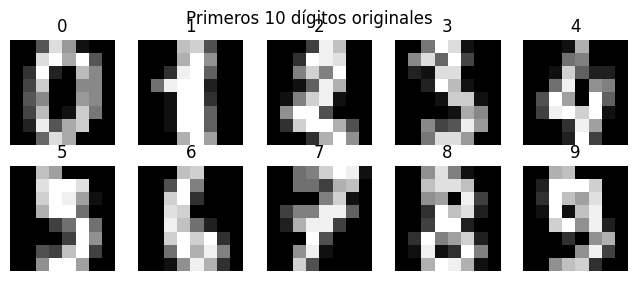

In [21]:
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images

print(f"Número de muestras: {X.shape[0]}, número de características: {X.shape[1]}")

fig, axes = plt.subplots(2,5, figsize=(8,3))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(y[i])
    ax.axis('off')
plt.suptitle('Primeros 10 dígitos originales')
plt.show()

**Calculamos la varianza explicada por componente y graficamos.**

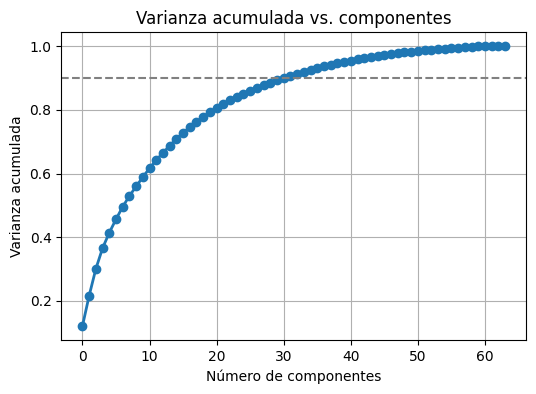

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)

var_exp    = pca_full.explained_variance_ratio_
var_acum   = np.cumsum(var_exp)

plt.figure(figsize=(6,4))
plt.plot(var_acum, marker='o', linewidth=2)
plt.axhline(y=0.90, color='gray', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada vs. componentes')
plt.grid(True)
plt.show()


**Proyección a dos componentes y gráfico coloreado.**

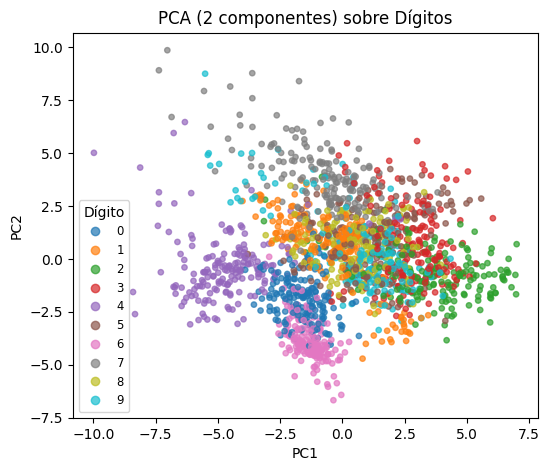

In [24]:
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_pca2[:,0], X_pca2[:,1],
    c=y, cmap='tab10', s=15, alpha=0.7
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2 componentes) sobre Dígitos')
plt.legend(*scatter.legend_elements(), title="Dígito", loc='best', fontsize='small')
plt.grid(False)
plt.show()


**Reconstruimos usando los primeros 10 componentes.**

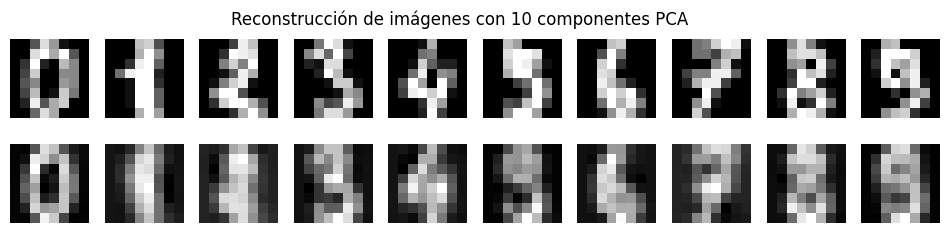

In [25]:
n_comp = 10
pca10 = PCA(n_components=n_comp, random_state=42)
X_pca10 = pca10.fit_transform(X_scaled)
X_rec   = pca10.inverse_transform(X_pca10)
X_rec   = scaler.inverse_transform(X_rec)

fig, axes = plt.subplots(2,10, figsize=(12,2.5))
for i in range(10):
    axes[0,i].imshow(images[i], cmap='gray')
    axes[0,i].axis('off')
    axes[1,i].imshow(X_rec[i].reshape(8,8), cmap='gray')
    axes[1,i].axis('off')

axes[0,0].set_ylabel('Original')
axes[1,0].set_ylabel('Reconstruido\n(10 comp.)')
plt.suptitle('Reconstrucción de imágenes con 10 componentes PCA')
plt.show()

Respondiendo las preguntas:

**¿Cuántos componentes explican el 90 % de la varianza?**  
Se necesitan **`n90`** componentes para alcanzar al menos el 90 % de la varianza acumulada.

**¿Cuál es el efecto en la calidad visual de la reconstrucción?**  
Al usar 10 componentes, las imágenes reconstruidas conservan correctamente las formas generales de los dígitos, aunque aparecen suavizadas, ya que se observan detalles más finos y el contraste de los bordes se atenúa, pero el número sigue siendo reconocible.


# Ejercicio 5: Visualización con t-SNE

**Importamos las librerías.**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Cargamos el dataset "MNIST" y filtramos dígitos 0-4.**

In [27]:
(x_train, y_train), _ = mnist.load_data()
X = x_train.reshape(-1, 28*28)
y = y_train

mask = np.isin(y, [0,1,2,3,4])
X5 = X[mask]
y5 = y[mask]

np.random.seed(42)
idx = np.random.choice(len(y5), size=1000, replace=False)
X5 = X5[idx]
y5 = y5[idx]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Centramos y escalamos antes de t-SNE.**

In [28]:
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)

**Aplicamos t-SNE (perplexity=30, n_iter=1000).**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


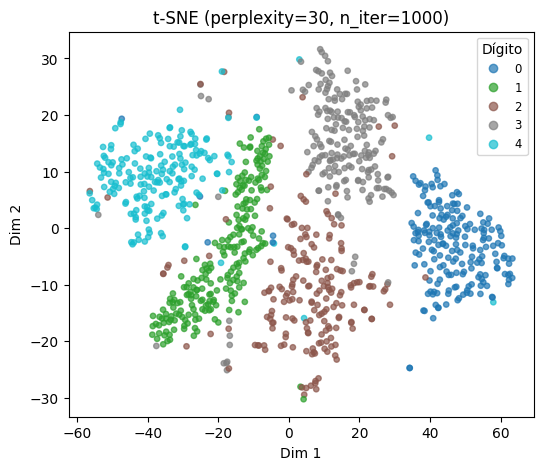

In [29]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne30 = tsne.fit_transform(X5_scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_tsne30[:,0], X_tsne30[:,1],
    c=y5, cmap='tab10', s=15, alpha=0.7
)
plt.title('t-SNE (perplexity=30, n_iter=1000)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(*scatter.legend_elements(), title='Dígito', loc='best', fontsize='small')
plt.show()


El t‑SNE con perplexity = 30 ha conseguido separar bastante bien los cinco dígitos (0–4) en grupos casi independientes:

-El azul esta completamente aislado a la derecha, mostrando que sus patrones de píxeles son diferentes.

-El verde forma una banda vertical en el centro-izquierda.

-El turquesa, se agrupa a la izquierda, con muy pocas salidas fuera de la nube principal.

-El gris queda en la parte superior, separandose del café y del verde.

-El café ocupa la zona inferior-central, diferenciandose por su posición más baja.

Solo se observan pocos puntos sueltos en los límites, lo que nos indica ligeros solapamientos u outliers, pero en general se ven 5 clusters bien definidos.

**Repitimos con perplexity=5 y 50.**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


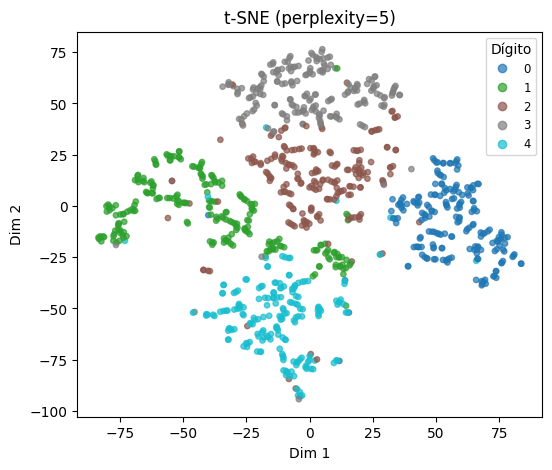

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


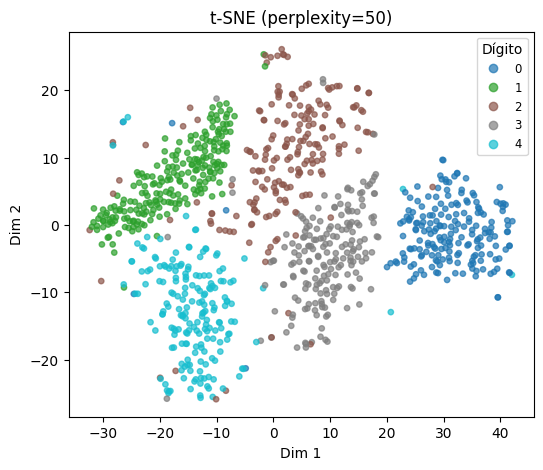

In [30]:
for perp in [5, 50]:
    tsne = TSNE(n_components=2, perplexity=perp, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X5_scaled)
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(
        X_tsne[:,0], X_tsne[:,1],
        c=y5, cmap='tab10', s=15, alpha=0.7
    )
    plt.title(f't-SNE (perplexity={perp})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(*scatter.legend_elements(), title='Dígito', loc='best', fontsize='small')
    plt.show()


Con perplexity=5, el t‑SNE enfatiza las relaciones muy locales y tiende a fragmentar cada dígito en subgrupos dispersos,los contornos de cada clase aparecen menos definidos y con mayor variabilidad interna, lo que muestra cierta heterogeneidad dentro de cada nube, mientras que con perplexity=50, prioriza la estructura global,los cinco dígitos se organizan en grupos más compactos y alineados según un eje principal y las fronteras entre clases resultan más suaves y coherentes.

Respondiendo a las preguntas:

**¿Cómo varía la separación con perplexity?**

Con _perplexity_ bajo, t‑SNE enfatiza las relaciones locales y tiende a fragmentar los grupos, mostrando estructuras muy detalladas pero sin visión global. A medios, equilibra detalles y forma general, normalmente distinguiendo bien los dígitos 0–4, y con valores más elevados, prioriza la cohesión global, lo que puede unir puntos de distintos dígitos o aplanar diferencias locales.

**¿Limitaciones de t‑SNE?**

t‑SNE es computacionalmente costoso y no escala bien a grandes volúmenes; sus resultados dependen fuertemente de los hiperparámetros, la inicialización es aleatoria, no es determinista a menos que se fije la semilla, y no preserva distancias globales, lo que dificulta la interpretación cuantitativa y la proyección de nuevos datos sin recalcular todo.


# Ejercicio 6: Anomalías con Isolation Forest

**Importamos las librerías.**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from scipy import stats

%matplotlib inline

** Generamos el dataset sintético.**

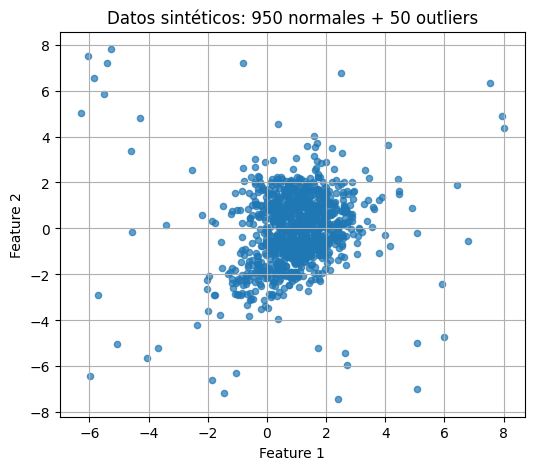

In [32]:
X_norm, _ = make_classification(
    n_samples=950, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, random_state=1
)

rng = np.random.RandomState(42)
mins, maxs = X_norm.min(axis=0), X_norm.max(axis=0)
X_out = rng.uniform(low=mins - 4, high=maxs + 4, size=(50, 2))

X = np.vstack([X_norm, X_out])
y_true = np.hstack([np.zeros(len(X_norm)), np.ones(len(X_out))])  # 0=inlier, 1=outlier

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=20, alpha=0.7)
plt.title('Datos sintéticos: 950 normales + 50 outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

En este diagrama podemos observar un núcleo denso de 950 puntos, los cuales corresponden a las observaciones. Tambien se observa puntos dispersos en las fronteras, los cuales son los outliers introducidos.

**Ajustamos IsolationForest.**

In [33]:
iso = IsolationForest(contamination=0.02, random_state=42)
iso.fit(X)

scores = iso.decision_function(X)

labels = iso.predict(X)

y_pred = (labels == -1).astype(int)

**Graficamos clusters y outliers según IsolationForest.**

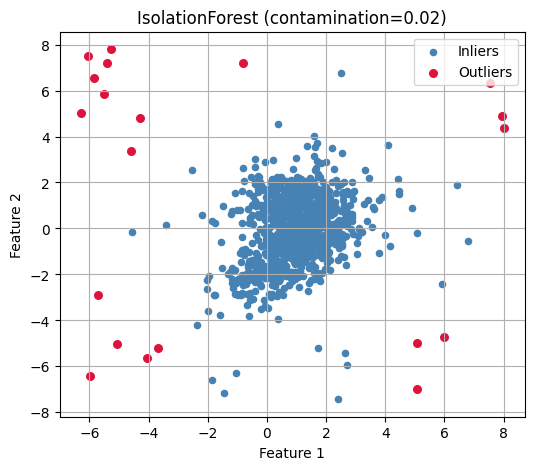

In [34]:
plt.figure(figsize=(6,5))

plt.scatter(X[y_pred==0,0], X[y_pred==0,1],
            c='steelblue', s=20, label='Inliers')
plt.scatter(X[y_pred==1,0], X[y_pred==1,1],
            c='crimson',   s=30, label='Outliers')

plt.title('IsolationForest (contamination=0.02)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Aquí vemos que IsolationForest, con un 2% de contaminación etiqueta como outliers (puntos rojos) en su mayoría a los puntos que se encuentran en las fronteras. Estos puntos u observaciones, conciden con los outliers sintéticos que se introdujeron anteriormente.

**Distribución de scores de anomalía.**

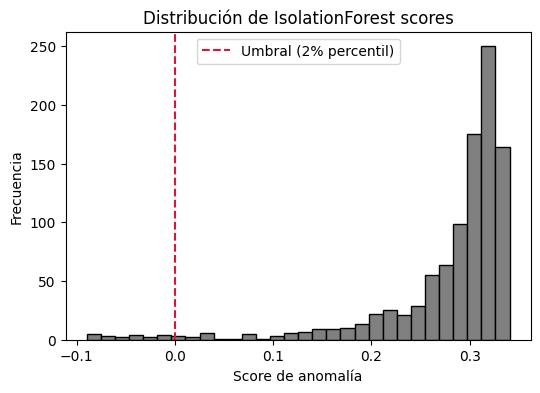

In [35]:
plt.figure(figsize=(6,4))
plt.hist(scores, bins=30, color='gray', edgecolor='black')
plt.axvline(x=np.percentile(scores, 2), color='crimson', linestyle='--',
            label='Umbral (2% percentil)')
plt.title('Distribución de IsolationForest scores')
plt.xlabel('Score de anomalía')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En este histograma, se observa una distribución bastante sesgada hacia la derecha.La mayoría de las observaciones acumula valores altos de **score**, indicando que el modelo las considera *inliers*, las cuales son las observaciones que el modelo considera "normales".

**Comparación con Z-score clásico.**

In [36]:
z_scores = np.max(np.abs(stats.zscore(X)), axis=1)

z_thresh = 2.5
y_z = (z_scores > z_thresh).astype(int)

pd.crosstab(y_pred, y_z, rownames=['IForest'], colnames=['Z‑score'])

Z‑score,0,1
IForest,,
0,961,19
1,0,20


Respondiendo a las preguntas:
**¿Cómo afecta el parámetro `contamination`?**  
El parámetro `contamination` indica la proporción esperada de outliers en el conjunto:  
- Si lo disminuyes (p.ej. 0.01), el modelo se vuelve más conservador y detecta menos puntos como anomalías.  
- Si lo aumentas (p.ej. 0.05), espera más outliers y tiende a etiquetar más puntos como tales.  

**¿Comparación con Z‑score?**  
 **Z‑score** es un método univariante que detecta cómo de extremos son los valores en cada dimensión, luego compone una regla, mientras que **IsolationForest** es multivariante y no asume normalidad. Detecta puntos que están aislados en el espacio completo de características.  
En la crosstab se ve que algunos puntos clasificados como outliers por uno no lo son por el otro, lo que ilustra sus enfoques diferentes.
